In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Check GPU availability
print(tf.test.is_gpu_available())
print(tf.config.list_physical_devices('GPU'))

True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Load the dataset and visualize images
labels = os.listdir("/kaggle/input/drowsiness-dataset/train")

In [4]:
# Load the data using ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30
)

In [5]:
# Load the dataset and split into training and testing sets
directory = "../input/drowsiness-dataset/train"
target_size = (80, 80)
batch_size = 4500

In [6]:
# Load the dataset and split into training and testing sets
data = datagen.flow_from_directory(
    directory,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)




Found 2321 images belonging to 4 classes.


In [7]:
# Split the data into training and testing sets
x, y = data.next()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [8]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

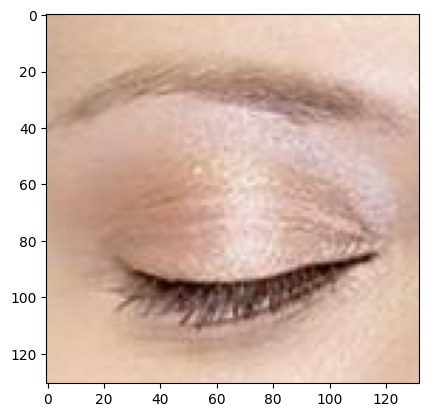

In [9]:
# Display a sample image
plt.imshow(plt.imread("../input/drowsiness-dataset/train/Closed/_2.jpg"))


In [10]:
# Build and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu", input_shape=(80, 80, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (4, 4), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(4, activation="softmax")
])

# Adjust the learning rate based on experimentation
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        65600     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0

In [11]:

hist = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))


Epoch 1/100
51/51 [==============================] - 11s 28ms/step - loss: 1.1803 - accuracy: 0.4206 - val_loss: 0.9053 - val_accuracy: 0.5911
Epoch 2/100
51/51 [==============================] - 1s 14ms/step - loss: 0.7518 - accuracy: 0.6496 - val_loss: 0.7675 - val_accuracy: 0.6456
Epoch 3/100
51/51 [==============================] - 1s 14ms/step - loss: 0.6753 - accuracy: 0.6700 - val_loss: 0.5270 - val_accuracy: 0.6973
Epoch 4/100
51/51 [==============================] - 1s 14ms/step - loss: 0.6067 - accuracy: 0.7143 - val_loss: 0.5130 - val_accuracy: 0.7418
Epoch 5/100
51/51 [==============================] - 1s 14ms/step - loss: 0.5487 - accuracy: 0.7050 - val_loss: 0.4636 - val_accuracy: 0.7819
Epoch 6/100
51/51 [==============================] - 1s 13ms/step - loss: 0.5074 - accuracy: 0.7377 - val_loss: 0.4482 - val_accuracy: 0.7747
Epoch 7/100
51/51 [==============================] - 1s 13ms/step - loss: 0.4838 - accuracy: 0.7488 - val_loss: 0.4429 - val_accuracy: 0.7561
Epoch

In [12]:
# Save the model
model.save("drowsiness_new6.h5")
model.save("drowsiness_new6.model")

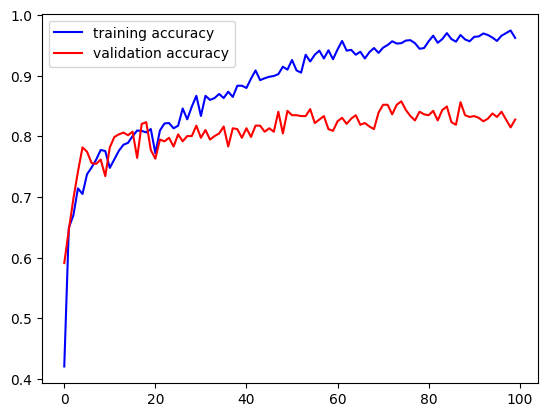

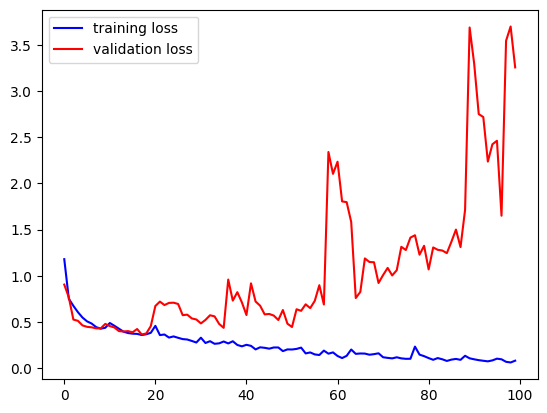

In [13]:
# Plot accuracy and loss
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="training accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="training loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [14]:
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

22/22 [==============================] - 0s 3ms/step


NameError: name 'confusion_mtrx' is not defined

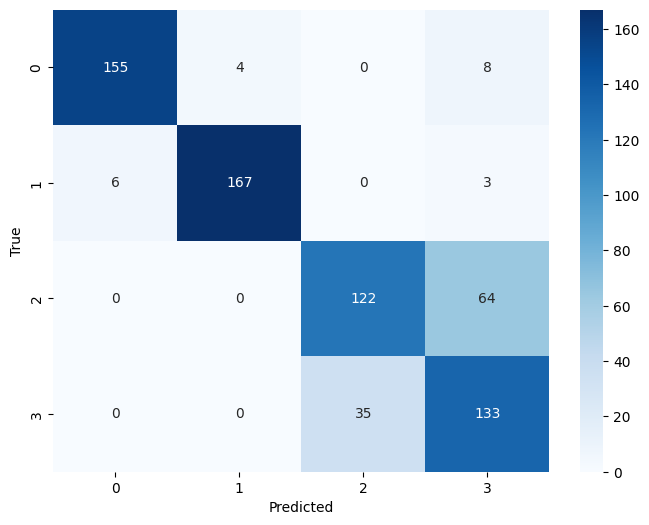

In [17]:
# Confusion Matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [19]:
# Print the confusion matrix
print("Confusion Matrix:\n", confusion_mtx)

# Accuracy Score
accuracy = np.sum(y_true == y_pred_classes) / len(y_true)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[155   4   0   8]
 [  6 167   0   3]
 [  0   0 122  64]
 [  0   0  35 133]]
Accuracy: 0.8278335724533716


In [20]:
# Classification Report
class_report = classification_report(y_true, y_pred_classes, target_names=labels)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

      Closed       0.96      0.93      0.95       167
        Open       0.98      0.95      0.96       176
        yawn       0.78      0.66      0.71       186
     no_yawn       0.64      0.79      0.71       168

    accuracy                           0.83       697
   macro avg       0.84      0.83      0.83       697
weighted avg       0.84      0.83      0.83       697



22/22 [==============================] - 0s 5ms/step


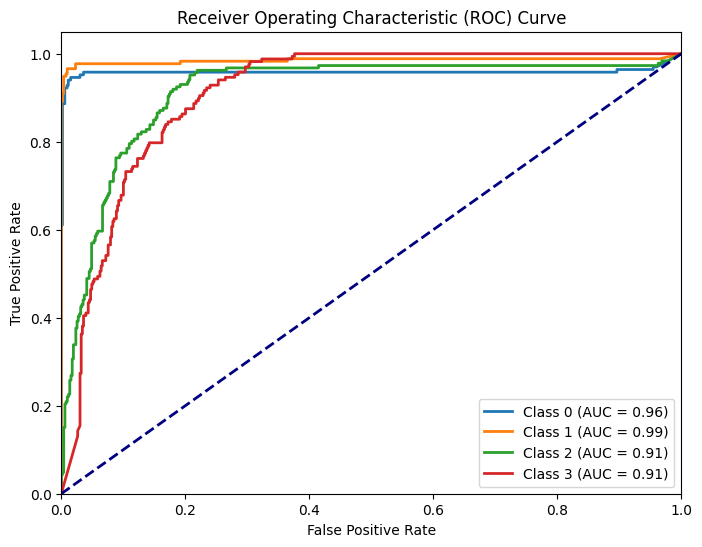

In [23]:
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import load_model
# Load the model
model = load_model('drowsiness_new6.h5')

# Get predicted probabilities from the model
y_scores = model.predict(x_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes=4
# Loop through each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()